
<center> <h1> <font color='blue'> Notebook 3 : Topic Modeling </font> </h1>  <h2> Group 4 </h2> </center>

### About this notebook

In this notebook we have built topic modeling and here are the steps :

    1-Prepare data already cleaned and grouped
    
    2-LDA Model with different data: 
    For visualization we have used the pyLDAvis tool which gives good interactive illustration.
    
    In this part we have build topic models for different data and data columns:
    
       - Topic Modeling with Title column
              -Build Model with non grouped data
              -Build Model with lemm data
       - Topic Modeling For Problems column
       - Topic Modeling For Problems response column
       - Topic modeling for grouped not lemmatized problems
       - Topic modeling for grouped lemmatized problems
       
       - Finding the optimal number of topics for LDA with the grouped and limmatized data
       - Finding the dominant topic in each sentence
       
       - Topic distribution across documents
      
     3- Topic Coherence
       

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import nltk
from pprint import pprint
import pickle


nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import  word_tokenize


# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.phrases import Phrases, Phraser
from gensim.models import LsiModel
from gensim.models import CoherenceModel,HdpModel


# spacy for lemmatization
import spacy


# Plotting tools
import pyLDAvis
import pyLDAvis.gensim 
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
pyLDAvis.enable_notebook()

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)


import re
import os
pd.set_option('max_colwidth', 400)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/siwarabbes/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/siwarabbes/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Prepare data already cleaned and grouped

In [2]:
cleaned_data = pd.read_csv('clean_environement.csv', low_memory=False, dtype = str)
cleaned_data.fillna('')
cleaned_data.head()

,Unnamed: 0,authorZipCode,title,problems,reponse_probleme
0,0,97231,transition écologique,NaN,NaN
1,1,57000,surpopulation,problèmes auxquels trouve confronté ensemble planète dénoncent parfait désordre gilets jaunes france dus avant surpopulation mondiale cette population passée milliards habitants milliards montera bientot milliards vers progrès communication village mondial chaque individu fin fond asie fin fond afrique passant quartiers campagnes pays aspire vivre peu bl mer mal lotis concitoyens logement nour...,problèmes auxquels trouve confronté ensemble planète dénoncent parfait désordre gilets jaunes france dus avant surpopulation mondiale cette population passée milliards habitants milliards montera bientot milliards vers progrès communication village mondial planète chaque individu fin fond asie fin fond afrique passant quartiers campagnes pays aspire vivre peu bl mer mal lotis concitoyens logem...
2,2,34140,climat,dérèglements climatiques crue sécheresse,éviter inondations obliger riverains communes nettoyer secteur
3,3,17400,pollution air eau,pollution air,taxer gros pollueurs entreprises bateaux marchands routiers etc
4,4,35430,economie vs ecologie,biodiversité disparition certaines espèces,changer mode vie impulser nouvelle économie agricole


In [3]:
lemm_grouped_data = pd.read_csv('grouped_lemmetized.csv', low_memory=False, dtype = str)
lemm_grouped_data.fillna('', inplace = True)
lemm_grouped_data.head()

,Unnamed: 0,authorZipCode,title,problems,reponse_probleme
0,0,1000,répartition transition action ferroutage plantation agriculteur transition suppression pesticide investissement budget transition transition transition argent prétexte protection environnement procédure déchet agriculteur industrie aise mutation véhicule culpabilisation ecologie police sauvon problème calendrier éducation transition circuit système consigne transition economie écologie punitiv...,dérèglement crue biodiversité disparition espèce pollution air dérèglement crue dérèglement crue dérèglement crue biodiversité disparition espèce problème pollution découle dérèglement crue pollution air emballage dérèglement crue dérèglement crue dérèglement crue precedente dérèglement crue dérèglement crue biodiversité disparition espèce biodiversité disparition espèce biodiversité dispariti...,effort particulier industrie carbone acteur fonction émission manière intégralité transition installation éolien mer utilisation énergie empreinte carbone produit empreinte produit tva produit produit baisse tva sanction donnée empreinte carbone commerce carton bouteille air ciel environnement élevage viande eau toilette replanton haie entretenon interdison faison bassin retention eau transiti...
1,1,1090,vie village moyen chaudière fioul voiture décentralisation relocalisation production véhicule écologie cause transition urgence avis,dérèglement crue pollution pollution air dérèglement crue dérèglement crue réponse production energie dérèglement crue,source problème utilisation centralisation ville désertification augmentation nécessité voiture augmentation ville sanction pays consommation extraction énergie place écologie école place développement niveau utilisation solution énergie fin surconsommation fin bouteille industrie
2,2,1100,pollution pétrole développement ecologie transport conscience vivre monde contribution pollution préservon maison urgence protection ere priorité pragamatique émotion recyclage agriculture liaison route transport marchandise pauvre,pollution air dérèglement crue consommation agriculture biodiversité disparition espèce biodiversité disparition espèce dérèglement crue biodiversité disparition espèce dérèglement crue dérèglement crue biodiversité disparition espèce problème ensemble puisqu biodiversité disparition espèce pollution acidifcation océan biodiversité problème problème pollution pollution air dérèglement crue,poids lourd exception transport centre ville véhicule véhicule livraison hydrogène expert pétrole an pétrole économie monde chaos choix pétrole pétrole pouvoir hui besoin solution déchet type maximum utilisation travail fusion solution masse hui agriculture subvention arrêt braconnage protection biotope concession zad lande pesticide importation déforestation environnement etat entreprise indi...
3,3,1110,santé proposition justice ruralité comportement civisme sens pollution air pollution nature santé environnement,dérèglement crue problème pollution air dérèglement crue dérèglement crue biodiversité disparition espèce pollution air dérèglement crue citoyen anture mac pesticide,convaincre sauvetage pose institution occurrence effort tendance besoin argent chose institution fmi argent pays exemple recherche fusion sacré avancée production b timent migre voiture effort conversion offerte france fmi miracle climat entreprise produit fonction coût carbone importation gratuité commun camion france train billet état exemple solution manière agriculture environnement produc...
4,4,1120,solution pollution travail prise responsabilité développement production consommation réduction dechet amelioration transport gratuité transport hypercentre hydrogene économie pollution entreprise transport transition exemple cite ecologie arme pollution arme pollution agriculture avenir transition solution solution,dérèglement crue pollution air dérèglement crue biodiversité disparition espèce dérèglement crue pollution air dérèglement crue dérèglement cr

In [4]:
grouped_data = pd.read_csv('grouped_filtered_not_cleaned_environement.csv', low_memory=False, dtype = str)
grouped_data.fillna('')
grouped_data.head()

,Unnamed: 0,authorZipCode,title,problems,reponse_probleme
0,0,1000,répartition juste efforts concernant transition écologique valoriser financièrement actions écologiques développement ferroutage plantation arbres subventionner agriculteurs transition ecologique suppression pesticides sortir investissements écolo budget passer transition écologique imposée transition écologique voulue transition déjà tard arrêter essayer argent sous prétexte protection enviro...,dérèglements climatiques crue sécheresse biodiversité disparition certaines espèces pollution air dérèglements climatiques crue sécheresse dérèglements climatiques crue sécheresse dérèglements climatiques crue sécheresse biodiversité disparition certaines espèces seul problème importants pollution air dérèglement climatique découle importants dérèglements climatiques crue sécheresse pollution ...,effort soutenu tant particuliers pollueurs importants industries administrations taxe carbone devrait toucher acteurs fonction émissions polluantes manière exponentielle intégralité affectée accélération transition écologique installation parcs éoliens zone venteuse mer centrales solaires zones rurales sud utilisation énergie géothermique réduire considérablement empreinte carbone taxer produi...
1,1,1090,rendre importante vie économique petits villages quels moyens changer chaudière fioul voiture diesel décentralisation relocalisation productions véhicule électrique écologie cause mondiale transition écologique durableet solidaire urgence climatique avis retraités,dérèglements climatiques crue sécheresse pollution océans pollution air dérèglements climatiques crue sécheresse dérèglements climatiques crue sécheresse toutes réponses ci dessus production energie fossile carburant plastique dérèglements climatiques crue sécheresse,travailler source problème réduire utilisation énergétique interdire plastiques biodégradables taxer assez lourdement paquebots croisière centralisation grandes villes encourage désertification services augmentation nécessité déplacer voiture augmentation bouchons grandes villes prendre sanctions commerciales envers pays pollueurs diminuer consommation stopper extraction énergies fossiles donn...
2,2,1100,pollution stop energies fosiles sevrer pétrole développement durable ecologie punitive enfumage esprits transport marchandises conscience écologique individuelle politique europeenne vers nouvelle fa vivre magnum monde concerné niveaux contribution proprtionnelle pollution engendrée préservons maison urgence protection planète etre toute ere priorité prendre recul analyser fa pragamatique glob...,pollution air dérèglements climatiques crue sécheresse consommation petrole agriculture chimique biodiversité disparition certaines espèces biodiversité disparition certaines espèces dérèglements climatiques crue sécheresse biodiversité disparition certaines espèces dérèglements climatiques crue sécheresse dérèglements climatiques crue sécheresse biodiversité disparition certaines espèces quat...,taxer poids lourds exception réaménagés fleuves capable supporter transport fluvial interdire centre ville véhicules moteur remplacer véhicules livraisons charrettes tirer chevaux privilégier hydrogène experts accordent dire pétrole ans prêts passer complètement pétrole contraire tellement dépendants pétrole lorsqu économie mondiale effondrera monde sombrera chaos inimaginable choix dès présen...
3,3,1110,bonne santé proposition international doute peu utopiste justice écologique ruralité changer comportements revoir priorités civisme bon sens pollution air réchauffement climatique pollution air penaliser ceux souillent nature santé publique environnement,dérèglements climatiques crue sécheresse problèmes réunis difficile émerger urgent important autres pollution air dérèglements climatiques crue sécheresse dérèglements climatiques crue sécheresse biodiversité disparition certaines espèces pollution air dérèglements climatiques crue sécheresse saletes jetes certains c

## Define Useful Functions

In [5]:
def tokenization(X_list):
    tokenized_list = [word_tokenize(it) for it in X_list]
    return tokenized_list

In [6]:
# This functions are used to capture bigrams and trigrams in the text offered by gensim
def make_bigrams(texts, bigram_mod):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts, trigram_mod):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [7]:
## This function get the data and the parameters for the topic models and returns LDA model
def get_topics(culumn_data_selected, n_topics=10, passes=20, add_bigrams = False):
    
    #Tokenize the data
    tokenized_data = tokenization(list(culumn_data_selected))
    
    ## Capture frequent bigrams and add them
    if(add_bigrams):
  
    # Build the bigram and trigram models
        bigram = Phrases(tokenized_data, min_count=5, threshold=200) # higher threshold fewer phrases.
        trigram = Phrases(bigram[tokenized_data], threshold=200)  

    # Faster way to get a sentence clubbed as a trigram/bigram
    #The goal of this class is to cut down memory consumption of Phrases, by discarding model state not strictly needed for the bigram detection task.
    #Use this instead of Phrases if you do not need to update the bigram statistics with new documents any more
        bigram_mod = Phraser(bigram)
        trigram_mod = Phraser(trigram)

    # Form Bigrams
        tokenized_data = make_bigrams(tokenized_data, bigram_mod)
    
    # Create Dictionary  
    id2word = corpora.Dictionary(tokenized_data)

    # Create Corpus
    texts = tokenized_data

    # Term Document Frequency
    corpus = [id2word.doc2bow(text) for text in texts]
  
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=n_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=passes,
                                           alpha='auto',
                                           per_word_topics=True)
  
    pprint(lda_model.print_topics())
  
    print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

    # Compute Coherence Score
    coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_data, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print('\nCoherence Score: ', coherence_lda)
  
    return lda_model, corpus, id2word

## Topic Modeling with Title column

### Build Model with non grouped data

In [8]:
list(cleaned_data['title'][2470:2475])

['vraie transition écologique',
 'énergies alternatives',
 'voiture avion paquebots portes contenairs',
 'mobilité',
 nan]

In [9]:
cleaned_data.fillna('',inplace=True)
count_nan = len(cleaned_data['title']) - cleaned_data['title'].count()
count_nan

0

# Using LDA

LDA, or Latent Dirichlet Allocation is arguably the most famous topic modelling algorithm out there. Out here we create a simple topic model with 8 topics.

### LDA with title column

In [10]:
data = list(cleaned_data['title'])
lda_model, corpus, id2word = get_topics(data, n_topics=8)

[(0,
  '0.097*"environnement" + 0.078*"ecologie" + 0.035*"vie" + 0.023*"nature" + '
  '0.021*"protection" + 0.021*"sens" + 0.019*"bon" + 0.018*"respect" + '
  '0.017*"sauver" + 0.017*"nucléaire"'),
 (1,
  '0.032*"contre" + 0.028*"vers" + 0.028*"ecologique" + 0.027*"déchets" + '
  '0.023*"eau" + 0.017*"punitive" + 0.016*"recyclage" + 0.016*"tva" + '
  '0.015*"pays" + 0.015*"oui"'),
 (2,
  '0.047*"transports" + 0.032*"urgence" + 0.029*"transport" + 0.028*"commun" + '
  '0.026*"climatique" + 0.024*"enfants" + 0.023*"agir" + 0.022*"avenir" + '
  '0.022*"développer" + 0.021*"changement"'),
 (3,
  '0.103*"écologie" + 0.033*"france" + 0.031*"énergie" + 0.027*"bio" + '
  '0.027*"priorité" + 0.023*"favoriser" + 0.022*"énergies" + 0.020*"mieux" + '
  '0.017*"interdire" + 0.015*"vivre"'),
 (4,
  '0.080*"pollution" + 0.038*"consommation" + 0.036*"air" + 0.035*"stop" + '
  '0.033*"monde" + 0.032*"produits" + 0.022*"réduire" + 0.020*"limiter" + '
  '0.018*"solutions" + 0.016*"électrique"'),
 (5,
  '

In [11]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/Users/siwarabbes/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.430425 -0.025615       1        1  25.921539
2      0.035796  0.419623       2        1  15.568323
3      0.065662 -0.095788       3        1  12.433666
0      0.064952 -0.070378       4        1  11.592612
4      0.072885 -0.071208       5        1  10.612030
1      0.061426 -0.062191       6        1  10.217580
5      0.067578 -0.056469       7        1   9.550421
6      0.062126 -0.037974       8        1   4.103836, topic_info=     Category         Freq            Term        Total  loglift  logprob
term                                                                     
0     Default  6875.000000      transition  6875.000000  30.0000  30.0000
58    Default  4141.000000        écologie  4141.000000  29.0000  29.0000
1     Default  6212.000000      écologique  6212.000000  28.0000  28.0000
27    Default  3645.000000   environnement  3645.000000  27.0000  27.0000
7     Default  2908.000000        ecologie  2908.000000  26.0000  26.0000
6     Default  2733.000000       pollution  2733.000000  25.0000  25.0000
74    Default  2355.000000      transports  2355.000000  24.0000  24.0000
256   Default  1618.000000         urgence  1618.000000  23.0000  23.0000
217   Default  1312.000000    consommation  1312.000000  22.0000  22.0000
4     Default  1250.000000             air  1250.000000  21.0000  21.0000
224   Default  2081.000000         planète  2081.000000  20.0000  20.0000
168   Default  1296.000000             vie  1296.000000  19.0000  19.0000
130   Default  1329.000000          france  1329.000000  18.0000  18.0000
26    Default  1468.000000       transport  1468.000000  17.0000  17.0000
445   Default  1206.000000            stop  1206.000000  16.0000  16.0000
250   Default  1257.000000         énergie  1257.000000  15.0000  15.0000
199   Default  1387.000000          commun  1387.000000  14.0000  14.0000
461   Default  1132.000000           monde  1132.000000  13.0000  13.0000
646   Default  1093.000000        produits  1093.000000  12.0000  12.0000
255   Default  1287.000000      climatique  1287.000000  11.0000  11.0000
124   Default  1042.000000          contre  1042.000000  10.0000  10.0000
13    Default  1224.000000         enfants  1224.000000   9.0000   9.0000
90    Default  1077.000000             bio  1077.000000   8.0000   8.0000
101   Default  1070.000000        priorité  1070.000000   7.0000   7.0000
488   Default  1153.000000            agir  1153.000000   6.0000   6.0000
410   Default   937.000000            vers   937.000000   5.0000   5.0000
407   Default   928.000000      ecologique   928.000000   4.0000   4.0000
466   Default  1126.000000          avenir  1126.000000   3.0000   3.0000
252   Default  1104.000000      développer  1104.000000   2.0000   2.0000
1759  Default   889.000000         déchets   889.000000   1.0000   1.0000
...       ...          ...             ...          ...      ...      ...
1044   Topic8   606.296570        économie   607.217529   3.1917  -3.0858
767    Topic8   454.546570          mettre   455.467560   3.1912  -3.3739
485    Topic8   423.152496           santé   424.073914   3.1911  -3.4454
679    Topic8   334.040863           aider   334.961945   3.1905  -3.6819
613    Topic8   295.794403         doivent   296.715851   3.1901  -3.8035
1479   Topic8   290.214508     générations   291.135284   3.1901  -3.8226
2518   Topic8   289.371368         humaine   290.292419   3.1901  -3.8255
936    Topic8   244.870117          courts   245.791550   3.1895  -3.9924
20     Topic8   233.552246         imposer   234.473267   3.1893  -4.0398
676    Topic8   227.942657        nouvelle   228.863922   3.1892  -4.0641
173    Topic8   226.337402        vraiment   227.258575   3.1892  -4.0712
682    Topic8   222.926605     industriels   223.847702   3.1891  -4.0863
1478   Topic8   210.637299         futures   211.557861   3.1889  -4.1430
166    Topic8

### Build Model with lemm data

In [14]:
lemm_title=lemm_grouped_data['title']
list(lemm_title[:10])

['répartition transition action ferroutage plantation agriculteur transition suppression pesticide investissement budget transition transition transition argent prétexte protection environnement procédure déchet agriculteur industrie aise mutation véhicule culpabilisation ecologie police sauvon problème calendrier éducation transition circuit système consigne transition economie écologie punitive toit contribution air transition avenir terre production énergie pays réparation richesse transition transition consommation écologie infrastructure ecologie progrès préconisation génération future écologie décision application volonté hydrogene barème lieu achat offre solution argent france lieu asie consommation production france producteur écologie pollution transition transition suite transition écologie isolation jeu transition écologie compte débat question personne transition proposition urgence avenir territoire voiture particulier automobile baisse taxe produit urgence emprunt terre e

In [15]:
lemm_title.fillna('',inplace=True)
count_nan = len(lemm_title) - lemm_title.count()
count_nan

0

In [16]:
data = list(lemm_title)
lda_model2, corpus, id2word = get_topics(data, n_topics=4)

[(0,
  '0.024*"controle" + 0.023*"parking" + 0.017*"indépendance" + 0.015*"panneau" '
  '+ 0.012*"vol" + 0.011*"suggestion" + 0.011*"reflexion" + 0.011*"extinction" '
  '+ 0.010*"défiscalisation" + 0.010*"secteur"'),
 (1,
  '0.023*"europe" + 0.020*"source" + 0.019*"éolienne" + 0.019*"organisation" + '
  '0.019*"information" + 0.018*"réflexion" + 0.018*"expérimentation" + '
  '0.015*"covoiturage" + 0.014*"espace" + 0.014*"objectif"'),
 (2,
  '0.060*"transition" + 0.033*"écologie" + 0.027*"environnement" + '
  '0.025*"ecologie" + 0.020*"pollution" + 0.019*"transport" + 0.013*"énergie" '
  '+ 0.012*"france" + 0.012*"pollueur" + 0.012*"urgence"'),
 (3,
  '0.020*"conscience" + 0.018*"interdiction" + 0.018*"électricité" + 0.017*"b" '
  '+ 0.017*"recherche" + 0.015*"poids" + 0.015*"ressource" + 0.012*"lourd" + '
  '0.011*"lutte" + 0.011*"subvention"')]

Perplexity:  -6.714014219749375

Coherence Score:  0.3507885936442362


In [17]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model2, corpus, id2word)
vis

/Users/siwarabbes/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.391382  0.025773       1        1  82.824699
3     -0.166225  0.258841       2        1  10.747383
1     -0.122748 -0.186424       3        1   4.363565
0     -0.102410 -0.098190       4        1   2.064350, topic_info=     Category         Freq             Term        Total  loglift  logprob
term                                                                      
76    Default  6674.000000       transition  6674.000000  30.0000  30.0000
96    Default   294.000000       conscience   294.000000  29.0000  29.0000
82    Default  3602.000000         écologie  3602.000000  28.0000  28.0000
152   Default   265.000000     interdiction   265.000000  27.0000  27.0000
580   Default   252.000000      électricité   252.000000  26.0000  26.0000
373   Default   247.000000                b   247.000000  25.0000  25.0000
346   Default   238.000000        recherche   238.000000  24.0000  24.0000
28    Default  3031.000000    environnement  3031.000000  23.0000  23.0000
237   Default   216.000000            poids   216.000000  22.0000  22.0000
23    Default  2768.000000         ecologie  2768.000000  21.0000  21.0000
223   Default   212.000000        ressource   212.000000  20.0000  20.0000
586   Default   134.000000           europe   134.000000  19.0000  19.0000
231   Default   172.000000            lourd   172.000000  18.0000  18.0000
49    Default  2237.000000        pollution  2237.000000  17.0000  17.0000
157   Default   117.000000           source   117.000000  16.0000  16.0000
232   Default   164.000000            lutte   164.000000  15.0000  15.0000
110   Default  2145.000000        transport  2145.000000  14.0000  14.0000
159   Default   161.000000       subvention   161.000000  13.0000  13.0000
574   Default   113.000000         éolienne   113.000000  12.0000  12.0000
115   Default   160.000000          justice   160.000000  11.0000  11.0000
317   Default   111.000000     organisation   111.000000  10.0000  10.0000
247   Default   110.000000      information   110.000000   9.0000   9.0000
601   Default   107.000000        réflexion   107.000000   8.0000   8.0000
418   Default   151.000000         polluant   151.000000   7.0000   7.0000
314   Default   104.000000  expérimentation   104.000000   6.0000   6.0000
544   Default   142.000000           centre   142.000000   5.0000   5.0000
425   Default   138.000000               co   138.000000   4.0000   4.0000
661   Default   133.000000    participation   133.000000   3.0000   3.0000
100   Default   131.000000           maison   131.000000   2.0000   2.0000
592   Default   128.000000      circulation   128.000000   1.0000   1.0000
...       ...          ...              ...          ...      ...      ...
404    Topic4    41.327690          panneau    42.060604   3.8628  -4.2006
843    Topic4    31.449982        reflexion    32.167336   3.8578  -4.4737
1267   Topic4    30.474079       extinction    31.188963   3.8572  -4.5052
1678   Topic4    31.705240       suggestion    32.454494   3.8570  -4.4656
869    Topic4    26.815630       solidarité    27.531345   3.8540  -4.6331
806    Topic4    26.917318          secteur    27.639603   3.8539  -4.6293
648    Topic4    22.455700            union    23.158653   3.8495  -4.8105
700    Topic4    23.239952          famille    23.967588   3.8495  -4.7762
3102   Topic4    27.824528  défiscalisation    28.699234   3.8494  -4.5962
1437   Topic4    33.094387              vol    34.151421   3.8489  -4.4227
798    Topic4    21.298323        ramassage    21.983059   3.8487  -4.8635
698    Topic4    21.349005       nourriture    22.049829   3.8481  -4.8611
1565   Topic4    20.591671       glyphosate    21.287840   3.8471  -4.8972
763    Topic4    21.792429         réalisme    22.541330   3.8466  -4.8405
647    Topic4    20.541325        nettoyage    21.247526   3.8466  -4.8997
1223   Topic4    19.411652       

We can notice that lemmatized data give better results since it only keeps nouns which better describe the problems.

## Topic Modeling For Problems column

In [ ]:
cleaned_problems = cleaned_data['problems']
cleaned_problems.fillna('',inplace=True)
lda_model, corpus, id2word = get_topics(cleaned_problems, n_topics=5)

In [19]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/Users/siwarabbes/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.202832  0.077319       1        1  25.680223
3     -0.356442  0.224183       2        1  24.336708
2      0.202749  0.077153       3        1  20.327589
4     -0.119817 -0.395524       4        1  17.807680
1      0.070678  0.016869       5        1  11.847794, topic_info=     Category          Freq             Term         Total  loglift  logprob
term                                                                        
97    Default  19696.000000        pollution  19696.000000  30.0000  30.0000
96    Default  17762.000000              air  17762.000000  29.0000  29.0000
92    Default  22939.000000      climatiques  22939.000000  28.0000  28.0000
94    Default  22706.000000     dérèglements  22706.000000  27.0000  27.0000
95    Default  21470.000000       sécheresse  21470.000000  26.0000  26.0000
93    Default  21450.000000             crue  21450.000000  25.0000  25.0000
11    Default  17121.000000     biodiversité  17121.000000  24.0000  24.0000
99    Default  16195.000000      disparition  16195.000000  23.0000  23.0000
100   Default  15981.000000          espèces  15981.000000  22.0000  22.0000
98    Default  15298.000000        certaines  15298.000000  21.0000  21.0000
17    Default   2304.000000       climatique   2304.000000  20.0000  20.0000
37    Default   2017.000000              eau   2017.000000  19.0000  19.0000
421   Default   1807.000000       importants   1807.000000  18.0000  18.0000
74    Default   2928.000000        problèmes   2928.000000  17.0000  17.0000
123   Default   1746.000000          déchets   1746.000000  16.0000  16.0000
198   Default   1464.000000         problème   1464.000000  15.0000  15.0000
285   Default   1556.000000           toutes   1556.000000  14.0000  14.0000
269   Default   1515.000000    environnement   1515.000000  13.0000  13.0000
196   Default   1232.000000        important   1232.000000  12.0000  12.0000
38    Default   1191.000000         ensemble   1191.000000  11.0000  11.0000
164   Default   1393.000000             liés   1393.000000  10.0000  10.0000
481   Default   1153.000000              lié   1153.000000   9.0000   9.0000
137   Default   1291.000000          érosion   1291.000000   8.0000   8.0000
35    Default   1134.000000      dérèglement   1134.000000   7.0000   7.0000
146   Default    999.000000             sols    999.000000   6.0000   6.0000
353   Default   1239.000000       ressources   1239.000000   5.0000   5.0000
136   Default   1163.000000         littoral   1163.000000   4.0000   4.0000
508   Default    985.000000            terre    985.000000   3.0000   3.0000
395   Default   1088.000000           autres   1088.000000   2.0000   2.0000
298   Default    895.000000    réchauffement    895.000000   1.0000   1.0000
...       ...           ...              ...           ...      ...      ...
96     Topic5  17762.097656              air  17762.927734   2.1330  -0.9529
276    Topic5    477.496887       pollutions    478.348846   2.1312  -4.5692
251    Topic5    383.341187  surconsommation    384.188477   2.1308  -4.7888
1009   Topic5    350.533325             fois    351.417694   2.1305  -4.8783
431    Topic5    334.420837       plastiques    335.273163   2.1305  -4.9254
277    Topic5    196.562439         énergies    197.460587   2.1285  -5.4568
260    Topic5    184.530975              sol    185.397964   2.1283  -5.5200
592    Topic5    151.667496         fossiles    152.510574   2.1275  -5.7161
823    Topic5    148.697006        agricoles    149.559509   2.1272  -5.7359
1725   Topic5    136.126526     industrielle    136.978790   2.1268  -5.8242
193    Topic5    144.007172        transport    144.953613   2.1265  -5.7679
706    Topic5    119.149422            faune    119.992249   2.1260  -5.9574
907    Topic5    109.863411      démographie    110.705711   2.1254  -6.0385
1427   Topic5    100.033707        lu

Problems column gave better results than the title which seems logic since it is the one that more probably contain problems.

## Topic Modeling For Problems response column



In [20]:
data = list(cleaned_data['reponse_probleme'])
lda_model, corpus, id2word = get_topics(data, n_topics=5)

[(0,
  '0.023*"transports" + 0.018*"développer" + 0.016*"transport" + 0.016*"taxer" '
  '+ 0.015*"favoriser" + 0.014*"réduire" + 0.014*"consommation" + '
  '0.014*"énergie" + 0.013*"entreprises" + 0.013*"énergies"'),
 (1,
  '0.013*"pays" + 0.012*"environnement" + 0.012*"écologique" + '
  '0.010*"transition" + 0.010*"niveau" + 0.008*"politique" + 0.008*"prendre" + '
  '0.007*"contre" + 0.007*"planète" + 0.006*"rendre"'),
 (2,
  '0.044*"produits" + 0.028*"interdire" + 0.025*"agriculture" + '
  '0.019*"pesticides" + 0.016*"bio" + 0.014*"fran" + 0.011*"agriculteurs" + '
  '0.008*"autres" + 0.008*"agricoles" + 0.008*"produit"'),
 (3,
  '0.016*"arrêter" + 0.015*"eau" + 0.014*"villes" + 0.011*"pollution" + '
  '0.010*"créer" + 0.010*"zones" + 0.009*"pollueurs" + 0.009*"nature" + '
  '0.009*"ville" + 0.008*"grandes"'),
 (4,
  '0.011*"voiture" + 0.010*"exemple" + 0.009*"donc" + 0.009*"pollution" + '
  '0.009*"vie" + 0.009*"voitures" + 0.008*"changer" + 0.008*"france" + '
  '0.008*"monde" + 0.00

In [21]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/Users/siwarabbes/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.120228  0.039865       1        1  24.369366
1      0.112026 -0.151003       2        1  24.269661
0     -0.081943 -0.298670       3        1  22.288792
3      0.208024  0.237479       4        1  15.658030
2     -0.358335  0.172329       5        1  13.414152, topic_info=     Category          Freq           Term         Total  loglift  logprob
term                                                                      
457   Default  14522.000000       produits  14522.000000  30.0000  30.0000
234   Default  12798.000000     transports  12798.000000  29.0000  29.0000
371   Default   9153.000000      interdire   9153.000000  28.0000  28.0000
259   Default   8372.000000    agriculture   8372.000000  27.0000  27.0000
665   Default   9889.000000     développer   9889.000000  26.0000  26.0000
233   Default   8991.000000      transport   8991.000000  25.0000  25.0000
105   Default   8861.000000          taxer   8861.000000  24.0000  24.0000
278   Default   6386.000000     pesticides   6386.000000  23.0000  23.0000
447   Default   8076.000000      favoriser   8076.000000  22.0000  22.0000
217   Default   7771.000000        réduire   7771.000000  21.0000  21.0000
70    Default   8019.000000           pays   8019.000000  20.0000  20.0000
261   Default   6077.000000        arrêter   6077.000000  19.0000  19.0000
254   Default   7434.000000        énergie   7434.000000  18.0000  18.0000
405   Default   5397.000000            bio   5397.000000  17.0000  17.0000
37    Default   5768.000000            eau   5768.000000  16.0000  16.0000
342   Default   6946.000000       énergies   6946.000000  15.0000  15.0000
518   Default   5515.000000         villes   5515.000000  14.0000  14.0000
421   Default   7160.000000  environnement   7160.000000  13.0000  13.0000
443   Default   6885.000000     écologique   6885.000000  12.0000  12.0000
24    Default   8839.000000   consommation   8839.000000  11.0000  11.0000
140   Default   6307.000000         commun   6307.000000  10.0000  10.0000
377   Default   9620.000000      pollution   9620.000000   9.0000   9.0000
43    Default   4527.000000           fran   4527.000000   8.0000   8.0000
100   Default   8679.000000    entreprises   8679.000000   7.0000   7.0000
440   Default   6309.000000        voiture   6309.000000   6.0000   6.0000
528   Default   6202.000000     transition   6202.000000   5.0000   5.0000
519   Default   6453.000000      véhicules   6453.000000   4.0000   4.0000
187   Default   5882.000000         niveau   5882.000000   3.0000   3.0000
324   Default   5281.000000        déchets   5281.000000   2.0000   2.0000
417   Default   5580.000000           donc   5580.000000   1.0000   1.0000
...       ...           ...            ...           ...      ...      ...
1544   Topic5   2518.746582      agricoles   2519.592773   2.0085  -4.8732
287    Topic5   2389.375732          santé   2390.224854   2.0085  -4.9259
1472   Topic5   2346.063477   interdiction   2346.908936   2.0085  -4.9442
1142   Topic5   2183.046875         grande   2183.899170   2.0085  -5.0162
1107   Topic5   2165.405762        qualité   2166.259033   2.0085  -5.0243
106    Topic5   2005.876343       agricole   2006.719727   2.0084  -5.1008
313    Topic5   2025.195923          payer   2026.052734   2.0084  -5.0913
1437   Topic5   1973.168579        élevage   1974.015503   2.0084  -5.1173
742    Topic5   1947.840942         locaux   1948.692871   2.0084  -5.1302
1469   Topic5   1866.041626      chimiques   1866.881592   2.0084  -5.1731
90     Topic5   1722.953857          vivre   1723.807007   2.0084  -5.2529
1134   Topic5   1693.925903        citoyen   1694.789551   2.0084  -5.2699
741    Topic5   1642.430176         viande   1643.277710   2.0083  -5.3007
270    Topic5   1601.774780     glyphosate   1602.617798   2.0083  -5.3258
1145   Topic5   1597.841919           voir   1598.6949

After constructing topics using different columns, 'problems' column gave the best results and the most understandable topics. Added to that it had the best coherence factor.

## Topic modeling for grouped not lemmatized problems :

In [22]:
grouped_problems = grouped_data['problems']
grouped_problems.fillna('',inplace=True)
lda_model, corpus, id2word = get_topics(grouped_problems, n_topics=4)

[(0,
  '0.007*"fran" + 0.005*"ais" + 0.005*"france" + 0.005*"pays" + '
  '0.005*"écologique" + 0.004*"état" + 0.004*"transition" + 0.004*"animaux" + '
  '0.004*"comment" + 0.004*"taxe"'),
 (1,
  '0.208*"biodiversité" + 0.200*"disparition" + 0.196*"espèces" + '
  '0.190*"certaines" + 0.002*"chasse" + 0.002*"hiérarchiser" + '
  '0.002*"phénomènes" + 0.002*"surexploitation" + 0.001*"pense" + '
  '0.001*"faune"'),
 (2,
  '0.092*"climatiques" + 0.091*"dérèglements" + 0.088*"sécheresse" + '
  '0.088*"crue" + 0.083*"pollution" + 0.074*"air" + 0.009*"problèmes" + '
  '0.008*"climatique" + 0.006*"eau" + 0.006*"toutes"'),
 (3,
  '0.011*"ans" + 0.006*"celui" + 0.006*"depuis" + 0.006*"dont" + '
  '0.006*"produit" + 0.005*"donner" + 0.005*"cas" + 0.005*"milliards" + '
  '0.005*"nucléaires" + 0.004*"france"')]

Perplexity:  -5.829700346300796

Coherence Score:  0.39745972159730875


In [23]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/Users/siwarabbes/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.274502  0.244972       1        1  65.989662
1      0.356969  0.144745       2        1  20.859982
0     -0.057883 -0.180044       3        1   8.070568
3     -0.024584 -0.209673       4        1   5.079791, topic_info=     Category          Freq             Term         Total  loglift  logprob
term                                                                        
18    Default  16781.000000     biodiversité  16781.000000  30.0000  30.0000
36    Default  15908.000000      disparition  15908.000000  29.0000  29.0000
52    Default  15598.000000          espèces  15598.000000  28.0000  28.0000
20    Default  15140.000000        certaines  15140.000000  27.0000  27.0000
28    Default  23188.000000      climatiques  23188.000000  26.0000  26.0000
44    Default  22980.000000     dérèglements  22980.000000  25.0000  25.0000
138   Default  22103.000000       sécheresse  22103.000000  24.0000  24.0000
34    Default  22044.000000             crue  22044.000000  23.0000  23.0000
100   Default  20959.000000        pollution  20959.000000  22.0000  22.0000
6     Default  18587.000000              air  18587.000000  21.0000  21.0000
106   Default   2344.000000        problèmes   2344.000000  20.0000  20.0000
244   Default    602.000000              vie    602.000000  19.0000  19.0000
518   Default   1335.000000    environnement   1335.000000  18.0000  18.0000
27    Default   1936.000000       climatique   1936.000000  17.0000  17.0000
279   Default    476.000000         question    476.000000  16.0000  16.0000
64    Default    413.000000           france    413.000000  15.0000  15.0000
38    Default    291.000000             dont    291.000000  14.0000  14.0000
546   Default    398.000000             pays    398.000000  13.0000  13.0000
380   Default    404.000000       écologique    404.000000  12.0000  12.0000
1026  Default    221.000000              ans    221.000000  11.0000  11.0000
230   Default   1625.000000              eau   1625.000000  10.0000  10.0000
140   Default   1623.000000           toutes   1623.000000   9.0000   9.0000
108   Default    568.000000         produits    568.000000   8.0000   8.0000
404   Default    391.000000            cette    391.000000   7.0000   7.0000
569   Default    440.000000            santé    440.000000   6.0000   6.0000
513   Default    538.000000             donc    538.000000   5.0000   5.0000
439   Default    338.000000       transition    338.000000   4.0000   4.0000
63    Default    238.000000             fran    238.000000   3.0000   3.0000
704   Default    298.000000          animaux    298.000000   2.0000   2.0000
86    Default   1334.000000             liés   1334.000000   1.0000   1.0000
...       ...           ...              ...           ...      ...      ...
1879   Topic4     53.013241               an     53.792877   2.9653  -5.9005
2312   Topic4     50.517990         national     51.291157   2.9647  -5.9487
1797   Topic4     49.081409      directement     49.859348   2.9642  -5.9776
1139   Topic4     50.468742           éolien     51.269455   2.9642  -5.9497
1803   Topic4     48.162758      fabrication     48.942814   2.9638  -5.9965
1745   Topic4     43.941166          pendant     44.692295   2.9630  -6.0882
1732   Topic4     70.919792            forme     72.147499   2.9627  -5.6095
1815   Topic4     40.317059   provoqueraient     41.030811   2.9624  -6.1743
1035   Topic4     42.620182  catastrophiques     43.376266   2.9623  -6.1188
1810   Topic4     40.580311            outre     41.320934   2.9618  -6.1678
1632   Topic4     40.592453        constitue     41.391163   2.9604  -6.1675
2874   Topic4     40.583340        président     41.382423   2.9604  -6.1677
2159   Topic4     40.023838            poser     40.816635   2.9603  -6.1816
1816   Topic4     35.138985         souhaite     35.892849   2.9587  -6.3118
2164   Topic4 

## Topic modeling for grouped lemmatized problems :

We will first compute the optimal number of topics 

In [24]:

grouped_lemm_problems = lemm_grouped_data['problems']
grouped_lemm_problems.fillna('',inplace=True)
lda_model, corpus, id2word = get_topics(grouped_lemm_problems, n_topics=3)

[(0,
  '0.158*"dérèglement" + 0.153*"crue" + 0.147*"pollution" + '
  '0.113*"biodiversité" + 0.113*"disparition" + 0.112*"espèce" + 0.110*"air" + '
  '0.007*"problème" + 0.007*"érosion" + 0.005*"eau"'),
 (1,
  '0.038*"problème" + 0.025*"environnement" + 0.022*"eau" + 0.019*"terre" + '
  '0.015*"déchet" + 0.015*"ressource" + 0.012*"consommation" + 0.012*"vie" + '
  '0.012*"question" + 0.011*"énergie"'),
 (2,
  '0.031*"an" + 0.015*"milliard" + 0.011*"million" + 0.010*"france" + '
  '0.009*"état" + 0.009*"place" + 0.008*"véhicule" + 0.007*"service" + '
  '0.007*"mise" + 0.007*"voiture"')]

Perplexity:  -4.270032363713754

Coherence Score:  0.408261405150927


In [25]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/Users/siwarabbes/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.371107  0.038661       1        1  70.964584
1      0.140308 -0.257155       2        1  24.993732
2      0.230799  0.218494       3        1   4.041674, topic_info=     Category          Freq           Term         Total  loglift  logprob
term                                                                      
17    Default  22656.000000    dérèglement  22656.000000  30.0000  30.0000
13    Default  21971.000000           crue  21971.000000  29.0000  29.0000
7     Default  16242.000000   biodiversité  16242.000000  28.0000  28.0000
14    Default  16212.000000    disparition  16212.000000  27.0000  27.0000
24    Default  16070.000000         espèce  16070.000000  26.0000  26.0000
4     Default  15789.000000            air  15789.000000  25.0000  25.0000
41    Default  21331.000000      pollution  21331.000000  24.0000  24.0000
45    Default   3011.000000       problème   3011.000000  23.0000  23.0000
191   Default   1243.000000  environnement   1243.000000  22.0000  22.0000
91    Default    964.000000          terre    964.000000  21.0000  21.0000
19    Default   1797.000000            eau   1797.000000  20.0000  20.0000
123   Default    762.000000      ressource    762.000000  19.0000  19.0000
15    Default   1292.000000         déchet   1292.000000  18.0000  18.0000
68    Default    627.000000   consommation    627.000000  17.0000  17.0000
93    Default    603.000000            vie    603.000000  16.0000  16.0000
105   Default    591.000000       question    591.000000  15.0000  15.0000
353   Default    251.000000             an    251.000000  14.0000  14.0000
60    Default    556.000000        énergie    556.000000  13.0000  13.0000
254   Default    539.000000    conséquence    539.000000  12.0000  12.0000
46    Default    531.000000        produit    531.000000  11.0000  11.0000
27    Default    388.000000         france    388.000000  10.0000  10.0000
233   Default    523.000000          homme    523.000000   9.0000   9.0000
8     Default    488.000000          cause    488.000000   8.0000   8.0000
74    Default    461.000000      pesticide    461.000000   7.0000   7.0000
67    Default    430.000000    agriculture    430.000000   6.0000   6.0000
318   Default    421.000000        gestion    421.000000   5.0000   5.0000
206   Default    395.000000          santé    395.000000   4.0000   4.0000
65    Default    394.000000     production    394.000000   3.0000   3.0000
125   Default    392.000000       activité    392.000000   2.0000   2.0000
99    Default    389.000000          effet    389.000000   1.0000   1.0000
...       ...           ...            ...           ...      ...      ...
1567   Topic3     40.513519          étude     41.618191   3.1816  -5.3049
1807   Topic3     26.587162           bois     27.318909   3.1814  -5.7261
879    Topic3     32.908085         charge     33.831825   3.1808  -5.5128
699    Topic3     41.756680         marché     42.943562   3.1805  -5.2746
114    Topic3     30.326239   distribution     31.203798   3.1800  -5.5945
145    Topic3     23.269932   amélioration     23.961395   3.1792  -5.8593
299    Topic3     25.208166        essence     25.960688   3.1791  -5.7793
373    Topic3     23.652536   interdiction     24.384655   3.1780  -5.8430
2865   Topic3     20.760933  fonctionnaire     21.408010   3.1778  -5.9734
954    Topic3     24.377592     démocratie     25.139841   3.1777  -5.8128
563    Topic3     22.061878       élection     22.763386   3.1772  -5.9127
704    Topic3     20.475067       pratique     21.178154   3.1747  -5.9873
1187   Topic3     21.303312      hydrogène     22.042393   3.1744  -5.9476
1507   Topic3     27.671095    association     28.667320   3.1731  -5.6861
2498   Topic3     25.130955       avantage     26.016165   3.1739  -5.7824
586    Topic3     25.061501          fonds     26.001284   3.1717  -5.7852
1024   Topic

After applying LDA with grouped data we had the best results with limmatization.

### Find the optimal number of topics for LDA with the grouped and limmatized data

In [26]:
def get_topics_without_output(culumn_data_selected, n_topics=10, passes=20, add_bigrams = False):
 
  tokenized_data = tokenization(list(culumn_data_selected))
  if(add_bigrams):
    bigram = Phrases(tokenized_data, min_count=5, threshold=200)
    trigram = Phrases(bigram[tokenized_data], threshold=200) 
    bigram_mod = Phraser(bigram)
    trigram_mod = Phraser(trigram)
    tokenized_data = make_bigrams(tokenized_data, bigram_mod)
    
  id2word = corpora.Dictionary(tokenized_data)
  texts = tokenized_data
  corpus = [id2word.doc2bow(text) for text in texts]
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=n_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=passes,
                                           alpha='auto',
                                           per_word_topics=True)
  
#   pprint(lda_model.print_topics())
  
  perplexity = lda_model.log_perplexity(corpus)
  print('\nPerplexity: ', perplexity)  # a measure of how good the model is. lower the better.

  # Compute Coherence Score
  coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_data, dictionary=id2word, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  print('\nCoherence Score: ', coherence_lda)
  
  return lda_model, corpus, id2word, perplexity, coherence_lda

In [27]:
def compute_coherence_values(data, start=3, limit= 14, step=3, passes = 20):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print('Now computing lda with number of topics equal to {}'.format(num_topics))
        lda_model, corpus, id2word, perplexity, coherence_lda = get_topics_without_output(data, n_topics=num_topics)
        model_list.append(lda_model)
        coherence_values.append(coherence_lda)

    return model_list, coherence_values, corpus

In [28]:
data = list(lemm_grouped_data['problems'])
start=2
limit=11
step=2
model_list, coherence_values, corpus = compute_coherence_values(data, start, limit, step, passes = 100)

Now computing lda with number of topics equal to 2

Perplexity:  -4.25510942444131

Coherence Score:  0.4246465833292471
Now computing lda with number of topics equal to 4

Perplexity:  -4.28569950721305

Coherence Score:  0.4331701039736392
Now computing lda with number of topics equal to 6

Perplexity:  -4.327249797317726

Coherence Score:  0.33549946265461955
Now computing lda with number of topics equal to 8

Perplexity:  -4.3871515542455946

Coherence Score:  0.3580259380200982
Now computing lda with number of topics equal to 10

Perplexity:  -4.524684352742348

Coherence Score:  0.4272590761098584


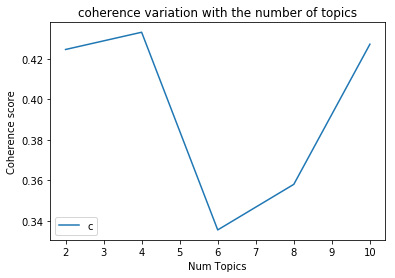

In [29]:
# Show graph
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.title('coherence variation with the number of topics')
plt.show()

Optimal number of topics is 4

In [30]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4246
Num Topics = 4  has Coherence Value of 0.4332
Num Topics = 6  has Coherence Value of 0.3355
Num Topics = 8  has Coherence Value of 0.358
Num Topics = 10  has Coherence Value of 0.4273


We can see that we found the optimal results with 4 topics so we continue the coming work with its results.

In [31]:
# Select the model and print the topics
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.161*"dérèglement" + 0.156*"crue" + 0.147*"pollution" + '
  '0.116*"biodiversité" + 0.115*"disparition" + 0.114*"espèce" + 0.111*"air" + '
  '0.006*"érosion" + 0.004*"proposition" + 0.003*"réponse"'),
 (1,
  '0.058*"problème" + 0.037*"eau" + 0.027*"environnement" + 0.025*"déchet" + '
  '0.021*"terre" + 0.016*"ressource" + 0.016*"pollution" + '
  '0.014*"consommation" + 0.013*"vie" + 0.013*"question"'),
 (2,
  '0.024*"an" + 0.020*"état" + 0.018*"france" + 0.013*"place" + '
  '0.012*"personne" + 0.012*"milliard" + 0.011*"transition" + 0.010*"véhicule" '
  '+ 0.009*"année" + 0.009*"voiture"'),
 (3,
  '0.021*"besoin" + 0.018*"raison" + 0.015*"vis" + 0.011*"financement" + '
  '0.009*"chaleur" + 0.009*"maison" + 0.009*"civilisation" + 0.009*"finance" + '
  '0.008*"influence" + 0.008*"preuve"')]


### Finding the dominant topic in each sentence

One of the practical application of topic modeling is to determine what topic a given document is about.

To find that, we find the topic number that has the highest percentage contribution in that document.

The format_topics_sentences() function below nicely aggregates this information in a presentable table

In [32]:
def format_topics_sentences(ldamodel, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()
    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic[['Dominant_Topic']] = df_dominant_topic[['Dominant_Topic']].astype(int)
# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0,0.6749,"dérèglement, crue, pollution, biodiversité, disparition, espèce, air, érosion, proposition, réponse",dérèglement crue biodiversité disparition espèce pollution air dérèglement crue dérèglement crue dérèglement crue biodiversité disparition espèce problème pollution découle dérèglement crue pollution air emballage dérèglement crue dérèglement crue dérèglement crue precedente dérèglement crue dérèglement crue biodiversité disparition espèce biodiversité disparition espèce biodiversité dispariti...
1,1,0,0.8418,"dérèglement, crue, pollution, biodiversité, disparition, espèce, air, érosion, proposition, réponse",dérèglement crue pollution pollution air dérèglement crue dérèglement crue réponse production energie dérèglement crue
2,2,0,0.8039,"dérèglement, crue, pollution, biodiversité, disparition, espèce, air, érosion, proposition, réponse",pollution air dérèglement crue consommation agriculture biodiversité disparition espèce biodiversité disparition espèce dérèglement crue biodiversité disparition espèce dérèglement crue dérèglement crue biodiversité disparition espèce problème ensemble puisqu biodiversité disparition espèce pollution acidifcation océan biodiversité problème problème pollution pollution air dérèglement crue
3,3,0,0.7919,"dérèglement, crue, pollution, biodiversité, disparition, espèce, air, érosion, proposition, réponse",dérèglement crue problème pollution air dérèglement crue dérèglement crue biodiversité disparition espèce pollution air dérèglement crue citoyen anture mac pesticide
4,4,0,0.8009,"dérèglement, crue, pollution, biodiversité, disparition, espèce, air, érosion, proposition, réponse",dérèglement crue pollution air dérèglement crue biodiversité disparition espèce dérèglement crue pollution air dérèglement crue dérèglement crue pollution air biodiversité pollution air point pollution jour nuit tête taxe carburant dérèglement crue dérèglement crue biodiversité disparition espèce biodiversité disparition espèce socle pollution climat biodiversité resoudre sens pièce salon déma...
5,5,1,0.5277,"problème, eau, environnement, déchet, terre, ressource, pollution, consommation, vie, question",pollution air dérèglement crue urgence biodiversité forme pollution eau terre vie terre efficacité recyclage déchet urbanisation désertification espace problème
6,6,0,0.4442,"dérèglement, crue, pollution, biodiversité, disparition, espèce, air, érosion, proposition, réponse",dérèglement crue dérèglement crue generalité disparition espèce date extinction espèce discuté voie croissance économiste effet population exemple critère personne demande richesse disparition espèce dérèglement crue biodiversité disparition espèce question problème biodiversité date extinction espèce discuté voie effet croissance économiste effet population exemple critère personne demande ri...
7,7,0,0.8068,"dérèglement, crue, pollution, biodiversité, disparition, espèce, air, érosion, proposition, réponse",pollution air terre pollution eau dérèglement crue biodiversité disparition espèce stock énergie abimée combustion disparition espèce pollution air biodiversité disparition espèce biodiversité disparition espèce biodiversité disparition espèce biodiversité disparition espèce pollution pollueur crue biodiversité disparition espèce
8,8,1,0.4338,"problème, eau, environnement, déchet, terre, ressource, pollution, consommation, vie, question",dérèglement crue émission effet agriculture pollution pesticide utilisation produit dangerosité ouverture déplacement pollution énergie ressource place croissance population perte agriculture profit agriculture polluante lien distribution groupe dérèglement crue
9,9,0,0.8374,"dérèglement, crue, pollution, biodiversité, disparition, espèce, air, érosion, proposition, réponse",pollution air dérèglement crue alimentation école dérèglement crue pollution air déréglement eau biodiversité pollution air dérèglement biodiversité extinction masse

In [33]:
topic_names = ['Déreglements et disparition de certaines espèces', 'pollution et déchets','usage excessif des véhicules','écologie et finance']

In [34]:
zipcode_to_topic = pd.DataFrame()

zipcode_to_topic['zip_code'] = lemm_grouped_data['authorZipCode']
zipcode_to_topic['topic_number'] = df_dominant_topic['Dominant_Topic']
zipcode_to_topic.head(10)

,zip_code,topic_number
0,1000,0
1,1090,0
2,1100,0
3,1110,0
4,1120,0
5,1130,1
6,1140,0
7,1150,0
8,1160,1
9,1170,0


zipcode_to_topic contains zipcodes and corresponding problem.

### Find the most representative document for each topic

Sometimes just the topic keywords may not be enough to make sense of what a topic is about. So, to help with understanding the topic, you can find the documents a given topic has contributed to the most and infer the topic by reading that document. Whew!!



In [35]:
# Group top 5 sentences under each topic
sent_topics_sorted = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorted = pd.concat([sent_topics_sorted, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorted.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorted.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorted.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.9577,"dérèglement, crue, pollution, biodiversité, disparition, espèce, air, érosion, proposition, réponse",biodiversité disparition espèce pollution air dérèglement crue pollution air pollution air pollution air biodiversité disparition espèce biodiversité disparition espèce pollution air dérèglement crue pollution air biodiversité disparition espèce dérèglement érosion pollution air disparition biodiversité dérèglement crue biodiversité disparition espèce dérèglement crue dérèglement crue fois pol...
1,1.0,0.6470,"problème, eau, environnement, déchet, terre, ressource, pollution, consommation, vie, question",problème conscience gravité situation négligence hiérarchie problème interdépendant agriculture industrie polluant agriculture responsable perte biodiversité pollution eau élevage effet résistance élevage aliment biodiversité qualité eau santé mena
2,2.0,0.6151,"an, état, france, place, personne, milliard, transition, véhicule, année, voiture",finance transition priorité mesure vie service lutte corruption évasion imposition manière rémunération écart solution exemple chaudière voiture hauteur marshal etat compte solution manière nanti durée durée an solution supportable proportionnalité commence exception france solution plutot niveau fonction vie fonction ferroviaire découle redéfinition décentralisation état proposition transitio...
3,3.0,0.4103,"besoin, raison, vis, financement, chaleur, maison, civilisation, finance, influence, preuve",dérèglement crue biodiversité disparition espèce augmentation co atmosphére pollution eau disparition espèce biodiversité globalité interdépendance égard comporton conscience vie conservation instinct question sujet éclat cours lente évolution doté système système cellule noyau pseudopode pseudopode cellule organisation système cours évolution patte ami système début cerveau son mot évolution ...


### Topic distribution across documents


Finally, we want to understand the volume and distribution of topics in order to judge how widely it was discussed. The below table exposes that information.



In [36]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics.head()

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0,0.0,"dérèglement, crue, pollution, biodiversité, disparition, espèce, air, érosion, proposition, réponse",5573.0,0.9746
1,0.0,"dérèglement, crue, pollution, biodiversité, disparition, espèce, air, érosion, proposition, réponse",117.0,0.0205
2,0.0,"dérèglement, crue, pollution, biodiversité, disparition, espèce, air, érosion, proposition, réponse",27.0,0.0047
3,0.0,"dérèglement, crue, pollution, biodiversité, disparition, espèce, air, érosion, proposition, réponse",1.0,0.0002
4,0.0,"dérèglement, crue, pollution, biodiversité, disparition, espèce, air, érosion, proposition, réponse",NaN,NaN


# Topic Coherence

Let's identify which topic model is 'better'. By returning a score, we can compare between different topic models of the same. 

# Using LSI

LSI stands for Latent Semantic Indeixing - it is a popular information retreival method which works by decomposing the original matrix of words to maintain key topics. Gensim's implementation uses an SVD.

In [37]:

lsimodel = LsiModel(corpus=corpus, num_topics=5, id2word=id2word)
lsimodel.show_topics(num_topics=5)  # Showing only the top 5 topics


[(0,
  '0.459*"dérèglement" + 0.443*"crue" + 0.424*"pollution" + 0.321*"biodiversité" + 0.319*"disparition" + 0.317*"espèce" + 0.311*"air" + 0.065*"problème" + 0.034*"eau" + 0.025*"déchet"'),
 (1,
  '0.463*"espèce" + 0.459*"disparition" + 0.455*"biodiversité" + -0.429*"pollution" + -0.362*"air" + -0.161*"dérèglement" + -0.158*"crue" + -0.012*"déchet" + -0.011*"eau" + -0.008*"terre"'),
 (2,
  '0.523*"crue" + 0.516*"dérèglement" + -0.511*"pollution" + -0.370*"air" + -0.147*"biodiversité" + -0.132*"espèce" + -0.131*"disparition" + -0.036*"problème" + -0.029*"eau" + -0.016*"environnement"'),
 (3,
  '-0.628*"problème" + -0.293*"eau" + 0.288*"air" + -0.210*"environnement" + -0.167*"énergie" + -0.157*"vie" + -0.157*"déchet" + -0.143*"produit" + -0.140*"terre" + -0.118*"france"'),
 (4,
  '0.672*"problème" + -0.333*"eau" + -0.217*"terre" + -0.197*"vie" + -0.188*"énergie" + -0.154*"produit" + -0.141*"an" + -0.119*"france" + -0.104*"lieu" + -0.084*"transport"')]

# Using HDP

HDP, the Hierarchical Dirichlet process is an unsupervised topic model which figures out the number of topics on it's own

In [38]:
hdpmodel = HdpModel(corpus=corpus, id2word=id2word)



In [39]:
hdpmodel.print_topics(num_topics=8, num_words=10)

[(0,
  '0.108*dérèglement + 0.104*crue + 0.098*pollution + 0.077*biodiversité + 0.077*disparition + 0.076*espèce + 0.071*air + 0.015*problème + 0.009*eau + 0.006*déchet'),
 (1,
  '0.077*dérèglement + 0.074*crue + 0.069*pollution + 0.056*biodiversité + 0.056*espèce + 0.056*disparition + 0.049*air + 0.011*problème + 0.007*eau + 0.005*environnement'),
 (2,
  '0.054*dérèglement + 0.052*crue + 0.049*pollution + 0.040*disparition + 0.039*espèce + 0.039*biodiversité + 0.036*air + 0.008*problème + 0.005*eau + 0.003*érosion'),
 (3,
  '0.024*crue + 0.022*biodiversité + 0.021*dérèglement + 0.020*disparition + 0.018*espèce + 0.018*pollution + 0.014*air + 0.004*problème + 0.003*eau + 0.002*déchet'),
 (4,
  '0.019*dérèglement + 0.018*crue + 0.012*disparition + 0.012*pollution + 0.012*espèce + 0.011*biodiversité + 0.010*air + 0.002*problème + 0.002*population + 0.001*eau'),
 (5,
  '0.021*dérèglement + 0.018*crue + 0.016*pollution + 0.013*disparition + 0.012*air + 0.012*espèce + 0.012*biodiversité + 0

In [44]:
lsitopics = [[word for word, prob in topic] for topicid, topic in lsimodel.show_topics(formatted=False)]

hdptopics = [[word for word, prob in topic] for topicid, topic in hdpmodel.show_topics(formatted=False)]

ldatopics = [[word for word, prob in topic] for topicid, topic in lda_model.show_topics(formatted=False)]

In [52]:
tokenized_data = tokenization(list(lemm_grouped_data['problems']))

lsi_coherence = CoherenceModel(topics=lsitopics[:10], texts=tokenized_data, dictionary=id2word, window_size=10).get_coherence()

hdp_coherence = CoherenceModel(topics=hdptopics[:10], texts=tokenized_data, dictionary=id2word, window_size=10).get_coherence()


lda_coherence = CoherenceModel(topics=ldatopics, texts=tokenized_data, dictionary=id2word, window_size=10).get_coherence()


In [53]:
def evaluate_bar_graph(coherences, indices):
    """
    Function to plot bar graph.
    
    coherences: list of coherence values
    indices: Indices to be used to mark bars. Length of this and coherences should be equal.
    """
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')

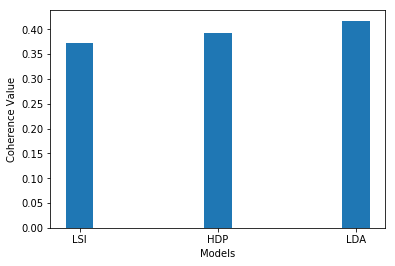

In [54]:
evaluate_bar_graph([lsi_coherence, hdp_coherence, lda_coherence],
                   ['LSI', 'HDP', 'LDA'])

# CONCLUSION

As a conclusion , these are the major topics that most frensh people talked about :'Déreglements et disparition de certaines espèces', 'pollution et déchets','usage excessif des véhicules','écologie et finance'